<a href="https://colab.research.google.com/github/alokproc/-Board-Infinity/blob/master/Deep_Learning_Practical_Exam_Set_1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network & Deep learning Practical Paper 

This Paper  has 1 case study

The case study (described below - 50 Marks) covers concepts taught in principle of deep learning
 
1st case study - Project 1:
 
The case study is from an open source dataset from Kaggle. 

Link to the Kaggle project site:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Given a Bank customer, can we build a classifier which can determine whether they will leave or not using Neural networks?

Case file: 

Dataset - bank.csv
 
The points distribution for this case is as follows:
1. Read the dataset in a new python notebook.(5 Marks)
2. Drop the columns which are unique for all users like IDs (5 Marks)
3. Apply Label Encoders  covert to catogorical type.(5 Marks)
4. Distinguish the feature and target set (5 Marks)
5. Divide the data set into Train and test sets (5 Marks)
6. Normalize the train and test data (5 Marks)
7. Initialize &amp ((5 Marks) 
9. Train the model ( 10 Marks )
10. Plot Final Train Accuracy from model ( 10 Marks)
11. Find the best optimizer for  the model (10 Marks)
12. Find the best Learning rate(10 Marks)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#%tensorflow_version 2.x
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
print(tf.__version__)
#From tensorflow v2.0 onwards, Eager Execution will be enabled by default

2.4.1


##1. Read the dataset in a new python notebook.  (5 Marks)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
bank_data = =

In [6]:
bank_data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4018,4019,15690209,Hsiao,715,Germany,Female,32,3,104857.19,2,1,0,114149.80,0
1709,1710,15713843,Kao,850,Spain,Male,30,2,0.00,2,0,1,27937.12,0
5279,5280,15731330,Tsui,652,Spain,Female,40,7,100471.34,1,1,1,124550.88,0
6720,6721,15647207,Onwuemelie,609,France,Male,26,7,0.00,2,1,0,98463.99,0
2299,2300,15763171,Hu,650,Germany,Female,25,2,114330.95,1,1,1,25325.07,0
6964,6965,15569249,Howarth,576,France,Female,55,6,44582.07,3,0,1,67539.85,1
3141,3142,15769596,Yen,710,Germany,Female,24,2,110407.44,2,0,0,15832.43,1
2157,2158,15750649,Uwakwe,744,France,Female,44,3,0.00,2,1,1,189016.14,0
9658,9659,15712264,Plumb,713,France,Female,39,10,0.00,2,1,1,126263.97,0
947,948,15741336,Ejimofor,715,France,Female,38,5,118590.41,1,1,1,5684.17,1


In [7]:
bank_data.shape

(10000, 14)

In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


###Insights
- We have 10000 rows and 14 features.
- Some of the features like Rownumber, CustomerId, Surname will not be useful for evaluation as they are unique for all users which does not describe any characteristics for our predictions. These features can be dropped.
- There are some features with object type. These features should be converted to category or Label encoding should be done before evaluation.
- The target feature Exited is of binary type (0 or 1)
- All the features have varied scale of measurement. Noramlization should be done before evaluation.

##2. Drop the columns which are unique for all users like IDs (5 Marks)

In [9]:
# Count unique values for each column in our dataset 
for i  in bank_data.columns:
    print(i, ":", bank_data[i].nunique())

RowNumber : 10000
CustomerId : 10000
Surname : 2932
CreditScore : 460
Geography : 3
Gender : 2
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2


In [10]:
bank_data.drop([                    ], axis = 1, inplace = True)

In [11]:
bank_data.shape

(10000, 11)

In [12]:
bank_data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5953,516,Spain,Female,31,7,0.00,1,1,0,47018.75,0
3990,708,France,Male,32,10,86614.06,2,1,1,172129.26,0
8950,461,France,Female,35,5,0.00,1,1,1,54209.02,0
1625,680,France,Male,44,3,0.00,2,1,0,86935.08,0
6063,762,France,Male,31,7,117687.35,1,1,1,159344.43,0
5343,727,France,Male,47,7,0.00,2,1,0,193305.35,0
4503,656,France,Male,33,7,138705.02,2,1,0,37136.15,0
2025,634,France,Male,45,9,0.00,2,0,0,17622.82,0
1540,530,Germany,Male,23,1,137060.88,2,1,1,165227.23,0
3009,551,France,Male,31,1,0.00,2,1,1,185105.44,0


In [13]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


##3. From above "Geography" and "Gender" are appearing to be object type variables.
##3. Apply Label Encoders  covert to catogorical type.(5 Marks)

In [14]:
# From above "Geography" and "Gender" are appearing to be object type variables.
# I we want to apply Label Encoders then it must be coverted to catogorical type.

bank_data["Geography"] = bank_data["Geography"].astype('category')
bank_data["Gender"] = bank_data["Gender"].astype('category')

bank_data["Geography"] = 
bank_data["Gender"] = 
bank_data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7260,773,0,0,41,7,190238.93,1,1,1,57549.65,0
3349,665,1,0,45,5,155447.65,2,1,0,51871.95,1
2174,646,0,1,26,4,139848.17,1,1,0,164696.27,0
4256,596,2,0,76,9,134208.25,1,1,1,13455.43,0
5616,805,2,1,26,2,0.00,2,1,1,25042.10,0
3255,507,0,0,29,4,89349.47,2,0,0,180626.68,0
5495,721,0,1,35,10,0.00,2,1,0,71594.26,0
1645,506,1,0,41,3,57745.76,1,1,0,4035.46,0
5765,520,0,1,30,3,143396.54,2,1,1,898.51,0
8754,776,0,0,43,4,0.00,2,0,1,162137.50,0


In [15]:
#Lets check if the conversion has taken lpace
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int8   
 2   Gender           10000 non-null  int8   
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), int8(2)
memory usage: 722.8 KB


###Insights
- After dropping the irrelevant features, we are left with 10 features and a target.
- Also we have converted the Gender and Geography features to category codes.

##4. Distinguish the feature and target set (5 Marks)

In [16]:
#Feature data set
X=
#Target data set
y=

In [ ]:
X.shape

(10000, 10)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.shape

(10000,)

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

##5. Divide the data set into Train and test sets (5 Marks)

In [17]:
# Split the dataset into the ration of 70:30

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = 

In [18]:
X_train.shape

(7000, 10)

In [19]:
X_test.shape

(3000, 10)

In [20]:
y_train.shape

(7000,)

In [21]:
y_test.shape

(3000,)

In [22]:
X_train.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2322,567,2,0,41,1,0.00,2,1,0,3414.72
3793,727,1,1,58,5,106913.43,1,1,0,25881.00
9445,689,2,0,28,5,95328.60,1,1,0,6129.61
9140,449,0,0,21,7,0.00,2,0,0,175743.92
9283,562,0,0,27,3,0.00,2,1,0,28137.03


In [23]:
y_train.sample(5)

9107    0
7335    0
1543    0
4264    1
2315    0
Name: Exited, dtype: int64

##6. Normalize the train and test data ((5 Marks) points)

In [24]:
from scipy import stats

X_train_Z = stats.zscore(X_train) 
X_test_Z = stats.zscore(X_test)

In [25]:
#We will have to convert train and test labels into one-hot vectors.
y_train_OH = 
y_test_OH = 

In [26]:
y_train[:10]

5189    0
7969    1
9039    0
5208    0
506     0
7060    0
9403    0
5087    1
4239    0
8884    1
Name: Exited, dtype: int64

In [27]:
y_train_OH[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

##7. Initialize &amp; build the model (5 Marks)

In [28]:
# Import the necessary layers from keras to build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
# Build a neural Network with a binary crossentropy loss function and sgd optimizer in Keras. The output layer with 2 neurons.

#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = Sequential()

#Add Dense/Input layer


#Add Dense Layer which provides 2 Output after applying sigmoid (Output Layer)


##8.Compile the model ( 5 Marks)

In [30]:
#Compile the model


##9.Train the model ( 10 Marks )

### Execute the model

In [31]:
#Train the. model


Epoch 1/15
700/700 [==============================] - 5s 2ms/step - loss: 0.6691 - accuracy: 0.6468 - val_loss: 0.5012 - val_accuracy: 0.8003
Epoch 2/15
700/700 [==============================] - 1s 2ms/step - loss: 0.4958 - accuracy: 0.7874 - val_loss: 0.4609 - val_accuracy: 0.8030
Epoch 3/15
700/700 [==============================] - 1s 2ms/step - loss: 0.4524 - accuracy: 0.8039 - val_loss: 0.4432 - val_accuracy: 0.8093
Epoch 4/15
700/700 [==============================] - 1s 2ms/step - loss: 0.4420 - accuracy: 0.8063 - val_loss: 0.4348 - val_accuracy: 0.8160
Epoch 5/15
700/700 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.8057 - val_loss: 0.4296 - val_accuracy: 0.8157
Epoch 6/15
700/700 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8186 - val_loss: 0.4258 - val_accuracy: 0.8170
Epoch 7/15
700/700 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8227 - val_loss: 0.4224 - val_accuracy: 0.8190
Epoch 

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print ("Final Train Accuracy from model history: ", model.history.history['accuracy'][-1]*100)
print ("Final Test Accuracy from model history: ", model.history.history['val_accuracy'][-1]*100)

Final Train Accuracy from model history:  84.54285860061646
Final Test Accuracy from model history:  84.60000157356262


##10.Plot Final Train Accuracy from model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


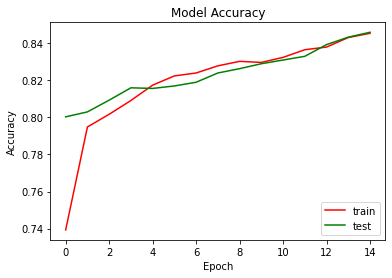

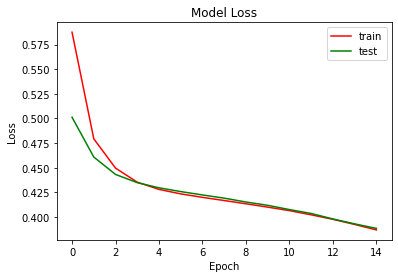

In [35]:
import matplotlib.pyplot as plt

# list all data in history
print(model.history.history.keys())

# Summary - History for accuracy







# Summary - History for loss

plt.plot(model.history.history['loss'], color = 'red')
plt.plot(model.history.history['val_loss'], color = 'green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

### Summary:
- As we have binary classification, we have used binary crossentropy for loss and sigmoid for activation in output layer.
- We have just tried with relu activation in input layer. We will find the best activation method using grid search.
- Same way we have tried with sgd optimizer. We will find the best optimizer using grid search.
The test accuracy we have got is 84.5499%

In [34]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

- Lets first findout the best optimizer among 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'

In [ ]:
#Setting up optimizers
sgd_opt = tf.keras.optimizers.SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True) #sgd_opt can be with momentum, nesterov or without, 2nd choice
rmsprop_opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9) #almost similar to adadelta
adagrad_opt = tf.keras.optimizers.Adagrad(learning_rate=0.01) #solves problem of learning rate 4th choice and 5th choice sgd without momentum
adadelta_opt = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95) #solves problem of learning rate gamma is to be set rho 3rd choice
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) #momentum and adadelta together approach. top choice
adamax_opt = tf.keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
nadam_opt = tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

##11. Find the best optimizer for  the model (10 Marks)

In [36]:
#Find out best optimizer

#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Function to create model, required for KerasClassifier

def create_model(optimizer='adam'):
  #Initialize Sequential model
  model_opt = Sequential()
  
  #Input Layer
  model_opt.add(Dense(10, input_dim = 10, activation='relu'))
  
  #Add Dense Layer which provides 1 Outputs after applying sigmoid (Output Layer)
  model_opt.add(Dense(1, activation='sigmoid'))
  
  #Compile the model
  model_opt.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  
  return model_opt

model_opt = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)


# define the grid search parameters



grid = GridSearchCV(estimator=model_opt, param_grid=param_grid, n_jobs=-1, scoring="accuracy", cv=2)
grid_result = grid.fit(X_train_Z, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849857 using {'optimizer': 'RMSprop'}
0.824857 (0.008000) with: {'optimizer': 'SGD'}
0.849857 (0.001857) with: {'optimizer': 'RMSprop'}
0.755714 (0.012286) with: {'optimizer': 'Adagrad'}
0.641286 (0.150714) with: {'optimizer': 'Adadelta'}
0.842143 (0.001000) with: {'optimizer': 'Adam'}
0.820429 (0.003286) with: {'optimizer': 'Adamax'}
0.849286 (0.000714) with: {'optimizer': 'Nadam'}


###From above we can see the best Optimizer is "Nadam" with Accuracy of 85.03%, we can see a slight increase in accuracy.

##12.Find the best Learning rate

Lets figure out the best learning rate.

In [37]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Here we will use best optimizer "Nadam" to find out best learning rate.
from tensorflow.keras.optimizers import Nadam

# Function to create model, required for KerasClassifier
def create_model(learning_rate=0.0001):
  #Initialize Sequential model
  model_lr = Sequential()
  #Input Layer
  model_lr.add(Dense(10, input_dim = 10, activation='relu'))
  #Add Dense Layer which provides 2 Outputs after applying sigmoid (Output Layer)
  model_lr.add(Dense(2, activation='sigmoid'))
  #Compile the model
  optimizer = Nadam(lr=learning_rate)
  model_lr.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model_lr

# create model
model_lr = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)

# define the grid search parameters
learning_rate = 
param_grid = 
grid = GridSearchCV(estimator=model_lr, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_Z, y_train_OH)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855143 using {'learning_rate': 0.01}
0.839143 (0.013143) with: {'learning_rate': 0.001}
0.855143 (0.000857) with: {'learning_rate': 0.01}
0.846286 (0.006000) with: {'learning_rate': 0.1}
0.826286 (0.012000) with: {'learning_rate': 0.2}
0.794571 (0.002571) with: {'learning_rate': 0.3}
0.794571 (0.002571) with: {'learning_rate': 0.5}
0.794571 (0.002571) with: {'learning_rate': 1.0}


### Best learning rate is appeared as 0.01 using Nadam as an optimizer

In [ ]:
nadam_opt = tf.keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

In [ ]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Tune the Neuron Activation Function for hidden layer

def create_model(activation='relu'):
  #Initialize Sequential model
  model_actf = Sequential()
  #Input Layer
  model_actf.add(Dense(10, input_dim = 10, activation=activation))
  #Add Dense Layer which provides 2 Outputs after applying sigmoid (Output Layer)
  model_actf.add(Dense(2, activation='sigmoid'))
  #Compile the model
  model_actf.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model_actf

# create model
model_actf = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)

# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model_actf, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_Z, y_train_OH)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855429 using {'activation': 'hard_sigmoid'}
0.853000 (0.000429) with: {'activation': 'softmax'}
0.854429 (0.002429) with: {'activation': 'softplus'}
0.850429 (0.001571) with: {'activation': 'softsign'}
0.854000 (0.000857) with: {'activation': 'relu'}
0.855143 (0.000571) with: {'activation': 'tanh'}
0.853714 (0.003143) with: {'activation': 'sigmoid'}
0.855429 (0.000857) with: {'activation': 'hard_sigmoid'}
0.807143 (0.005143) with: {'activation': 'linear'}


#### As per above best activation function for hidden layer is "softmax" and we can see a slight increase in accuracy also

In [ ]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Tune Network Weight Initialization

def create_model(init_mode='uniform'):
  #Initialize Sequential model
  model_nw = Sequential()
  #Input Layer
  model_nw.add(Dense(10, input_dim = 10, kernel_initializer = init_mode, activation='softmax'))
  #Add Dense Layer which provides 2 Outputs after applying sigmoid (Output Layer)
  model_nw.add(Dense(2, kernel_initializer = init_mode, activation='sigmoid'))
  #Compile the model
  model_nw.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model_nw

# create model
model_nw = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)

# define the grid search parameters
init_mode = ['zero', 'glorot_normal', 'uniform', 'lecun_uniform', 'normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)

grid = GridSearchCV(estimator=model_nw, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_Z, y_train_OH)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856857 using {'init_mode': 'he_uniform'}
0.794571 (0.002571) with: {'init_mode': 'zero'}
0.851714 (0.000286) with: {'init_mode': 'glorot_normal'}
0.852429 (0.001286) with: {'init_mode': 'uniform'}
0.851429 (0.003143) with: {'init_mode': 'lecun_uniform'}
0.854143 (0.001571) with: {'init_mode': 'normal'}
0.853571 (0.001857) with: {'init_mode': 'glorot_uniform'}
0.852714 (0.004429) with: {'init_mode': 'he_normal'}
0.856857 (0.000571) with: {'init_mode': 'he_uniform'}


####As we can see the best weight initialization is lecun_uniform but the accuracy slightly reduced, so we will not specify activation of initail weights.

In [ ]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Tune Dropout Regularization
# Tuning the dropout rate for regularization in an effort to limit overfitting and improve the model’s ability to generalize.

from tensorflow.keras.layers import Dropout

def create_model(dropout_rate=0.0):
  #Initialize Sequential model
  model_do = Sequential()
  #Input Layer
  model_do.add(Dense(10, input_dim = 10, activation='softmax'))
  model_do.add(Dropout(dropout_rate))
  #Add Dense Layer which provides 2 Outputs after applying sigmoid (Output Layer)
  model_do.add(Dense(2, activation='sigmoid'))
  #Compile the model
  model_do.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model_do

# create model
model_do = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)

# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model_do, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_Z, y_train_OH)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.857286 using {'dropout_rate': 0.1}
0.854571 (0.001429) with: {'dropout_rate': 0.0}
0.857286 (0.002714) with: {'dropout_rate': 0.1}
0.856000 (0.002857) with: {'dropout_rate': 0.2}
0.853857 (0.001286) with: {'dropout_rate': 0.25}
0.854571 (0.000000) with: {'dropout_rate': 0.3}
0.854857 (0.002857) with: {'dropout_rate': 0.4}
0.853714 (0.002571) with: {'dropout_rate': 0.5}
0.834714 (0.014143) with: {'dropout_rate': 0.6}
0.794571 (0.002571) with: {'dropout_rate': 0.7}
0.794571 (0.002571) with: {'dropout_rate': 0.75}
0.794571 (0.002571) with: {'dropout_rate': 0.8}
0.794571 (0.002571) with: {'dropout_rate': 0.9}


#### We can see overall dropout is not contributing to improvement of accuracy of the model, so we will not include dropout in our final model

In [ ]:
# Tune the Number of Neurons in the Hidden Layer
# The number of neurons in a layer is an important parameter to tune. 
# Generally the number of neurons in a layer controls the representational capacity of the network, at least at that point in the topology.

#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
  #Initialize Sequential model
  model_neu = Sequential()
  #Input Layer
  model_neu.add(Dense(neurons, input_dim = 10, activation='softmax'))
  #Add Dense Layer which provides 2 Outputs after applying sigmoid (Output Layer)
  model_neu.add(Dense(2, activation='sigmoid'))
  #Compile the model
  model_neu.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model_neu

# create model
model_neu = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)

# define the grid search parameters
neurons = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 100]
param_grid = dict(neurons=neurons)

grid = GridSearchCV(estimator=model_neu, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_Z, y_train_OH)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.854143 using {'neurons': 15}
0.840000 (0.007429) with: {'neurons': 5}
0.849857 (0.001000) with: {'neurons': 10}
0.854143 (0.001286) with: {'neurons': 15}
0.851286 (0.002429) with: {'neurons': 20}
0.849286 (0.002714) with: {'neurons': 25}
0.847714 (0.004000) with: {'neurons': 30}
0.845286 (0.003571) with: {'neurons': 35}
0.850143 (0.002429) with: {'neurons': 40}
0.848000 (0.004857) with: {'neurons': 45}
0.847857 (0.002143) with: {'neurons': 50}
0.852714 (0.003286) with: {'neurons': 55}
0.849571 (0.001571) with: {'neurons': 60}
0.846286 (0.005714) with: {'neurons': 100}


####Optimised no. of neuron are 40

###Final hyperparameters for optimization of the model are
- Optimizer = 'Nadam'
- Learning rate = 0.01
- Neuron Activation Function = "softmax"
- Network Weight Initialization = lecun_uniform 
- Dropout Regularization p = 0.0
- Number of Neurons in the Hidden Layer = 40


##Final Model Building based on above Optimised Hyperparameters

In [ ]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
final_model = Sequential()
  
#Input Layer
final_model.add(Dense(10, input_dim = 10, activation='softmax'))

#Dense Layer
final_model.add(Dense(40, activation='softmax'))

#Add Dense Layer which provides 2 Output after applying sigmoid (Output Layer)
final_model.add(Dense(2, activation='sigmoid'))
 
#Compile the model
final_model.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
 
#Train the model 
final_model.fit(X_train_Z, y_train_OH, validation_data=(X_test_Z, y_test_OH), epochs=90, batch_size=50)

Epoch 1/90
140/140 [==============================] - 1s 4ms/step - loss: 0.4588 - accuracy: 0.7949 - val_loss: 0.4312 - val_accuracy: 0.8003
Epoch 2/90
140/140 [==============================] - 0s 3ms/step - loss: 0.3954 - accuracy: 0.8240 - val_loss: 0.3917 - val_accuracy: 0.8403
Epoch 3/90
140/140 [==============================] - 0s 3ms/step - loss: 0.3654 - accuracy: 0.8513 - val_loss: 0.3763 - val_accuracy: 0.8533
Epoch 4/90
140/140 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8537 - val_loss: 0.3714 - val_accuracy: 0.8527
Epoch 5/90
140/140 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8571 - val_loss: 0.3714 - val_accuracy: 0.8467
Epoch 6/90
140/140 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8597 - val_loss: 0.3665 - val_accuracy: 0.8570
Epoch 7/90
140/140 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8639 - val_loss: 0.3646 - val_accuracy: 0.8540
Epoch 

In [ ]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 82        
Total params: 632
Trainable params: 632
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print ("Final Train Accuracy from model history: ", final_model.history.history['accuracy'][-1]*100)
print ("Final Test Accuracy from model history: ", final_model.history.history['val_accuracy'][-1]*100)

Final Train Accuracy from model history:  86.44285798072815
Final Test Accuracy from model history:  85.66666841506958


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


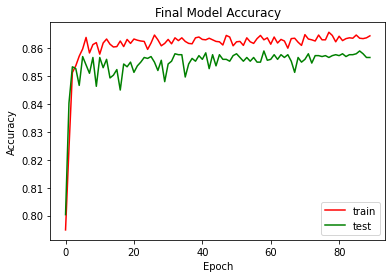

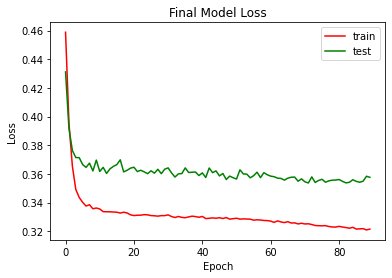

In [ ]:
# list all data in history
print(final_model.history.history.keys())

# Summary - History for accuracy
plt.plot(final_model.history.history['accuracy'], color = 'red')
plt.plot(final_model.history.history['val_accuracy'], color = 'green')
plt.title('Final Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Summary - History for loss

plt.plot(final_model.history.history['loss'], color = 'red')
plt.plot(final_model.history.history['val_loss'], color = 'green')
plt.title('Final Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

 Predict the results using 0.5 as a threshold 

In [ ]:
# make predictions for the testing set without threshold (default threshold is 0.5 for binary classification)
y_pred = final_model.predict(X_test_Z)

In [ ]:
print ("Prediction: ", y_pred[:20])

Prediction:  [[0.6285609  0.37231028]
 [0.9661311  0.03398145]
 [0.62034345 0.38052386]
 [0.8803222  0.11852288]
 [0.9472507  0.05338559]
 [0.9711963  0.02889308]
 [0.9937903  0.00627273]
 [0.8075102  0.19212307]
 [0.10976573 0.890083  ]
 [0.99376464 0.00629747]
 [0.97235686 0.02767735]
 [0.92213726 0.07713319]
 [0.96930885 0.03070862]
 [0.19465038 0.8049888 ]
 [0.9729921  0.02711225]
 [0.81839806 0.18071628]
 [0.94229054 0.05774713]
 [0.60468525 0.39520252]
 [0.92308277 0.07679774]
 [0.9674581  0.03258575]]


In [ ]:
# Make predictions for the testing set with threshold 0.5
y_pred_threshold = (final_model.predict_proba(X_test_Z) >= 0.5)

Instructions for updating:
Please use `model.predict()` instead.


In [ ]:
print ("Prediction: ", y_pred_threshold[:20])

Prediction:  [[ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]]


10. Print the Accuracy score and confusion matrix 

- Accuracy Scores for with and without threshold of 0.5

In [ ]:
from sklearn import metrics

In [ ]:
# Accuracy score for predictions with & without threshold
print ("Accuracy score for predictions without thershold: ", metrics.accuracy_score(y_test_OH, y_pred.round())*100)
print ("Accuracy score for predictions with threshold of 0.5: ", metrics.accuracy_score(y_test_OH, y_pred_threshold)*100)

Accuracy score for predictions without thershold:  85.63333333333333
Accuracy score for predictions with threshold of 0.5:  85.63333333333333


- Confusion Matrix

In [ ]:
print ("Confusion Matrix for predictions without threshold")
pd.DataFrame(metrics.confusion_matrix(y_test_OH.argmax(axis=1), y_pred.argmax(axis=1)),
                 columns=['Predicted_Negative', 'Predicted_Negative'], index=['Negative', 'Positive'])

Confusion Matrix for predictions without threshold


,Predicted_Negative,Predicted_Negative
Negative,2293,108
Positive,322,277


In [ ]:
print ("Confusion Matrix for predictions with specified threshold of 0.5")
pd.DataFrame(metrics.confusion_matrix(y_test_OH.argmax(axis=1), y_pred_threshold.argmax(axis=1)),
                 columns=['Predicted_Negative', 'Predicted_Negative'], index=['Negative', 'Positive'])

Confusion Matrix for predictions with specified threshold of 0.5


,Predicted_Negative,Predicted_Negative
Negative,2293,108
Positive,322,277


In [ ]:
from sklearn.metrics import classification_report
print ("Classification Report for predictions without threshold")
print(classification_report(y_test_OH, y_pred.round()))

Classification Report for predictions without threshold
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      2401
           1       0.72      0.46      0.56       599

   micro avg       0.86      0.86      0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000
 samples avg       0.86      0.86      0.86      3000



In [ ]:
print ("Classification Report for predictions with threshold of 0.5")
print(classification_report(y_test_OH, y_pred_threshold))

Classification Report for predictions with threshold of 0.5
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      2401
           1       0.72      0.46      0.56       599

   micro avg       0.86      0.86      0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000
 samples avg       0.86      0.86      0.86      3000



##Observations:
For binary classification by default the threshold is 0.5. So there is no difference in the accuracy score or classification report with and without specifying the 0.5 threshold.